In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [5]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [6]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,Doing Justice: A Prosecutor’s Thoughts on Crim...,Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [9]:
test.Author.value_counts()

Agatha Christie      18
Ladybird             14
Albert Uderzo        14
Nora Roberts         13
DK                   13
                     ..
Prof. Satish Jain     1
Srijan Pal Singh      1
Henning Mankell       1
Andy Warhol           1
M Pattabiraman        1
Name: Author, Length: 1224, dtype: int64

In [10]:
#q1 = train.Price.quantile(0.25)
#q3 = train.Price.quantile(0.75)
#iqr = q3-q1
#upper = q3+3*iqr
#lower = q1-3*iqr
#x = np.where((train.Price < lower )| (train.Price.values>upper))
#train.drop(index = x[0], inplace=True)
#train.reset_index(drop=True, inplace=True)

In [11]:
def words(text):
    return(len(str(text).lower().split()))

def letter(text):
    return(len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).lower().split() if w in stopwords]
    return(len(s))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s))

def n_title(text):
    s = [w for w in str(text).lower().split() if w.islower()]
    return(len(s))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]


train['Title_0'] = train.Title_0.apply(lambda x: words(x))
test['Title_0'] = test.Title_0.apply(lambda x: words(x))

train['Title_1'] = train.Title_1.apply(lambda x: words(x))
test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [12]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [13]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

In [14]:
train['Edition_t'] = train.Edition.str.extract(r'([a-zA-Z|\s]*),.*')
test['Edition_t'] = test.Edition.str.extract(r'([a-zA-Z|\s]*),.*')

In [15]:
train.Date.fillna(2014, inplace=True)
test.Date.fillna(2014, inplace=True)

In [16]:
train.Edition_t.replace({'':'other'}, inplace=True)
test.Edition_t.replace({'':'other'}, inplace=True)

In [17]:
t = set(train.Edition_t.value_counts().index).difference(set(test.Edition_t.value_counts().index))
train.Edition_t = train.Edition_t.apply(lambda x: np.NaN if x in list(t) else x)

In [18]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [19]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [20]:
train['Rating_t'] = train.Reviews.str.extract(r"(^\d*)")
test['Rating_t'] = test.Reviews.str.extract(r"(^\d*)")

In [21]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

#train['Rat_Rev'] = train['Rat_Rev'].apply(lambda x: x/5)
#test['Rat_Rev'] = test['Rat_Rev'].apply(lambda x: x/5)

In [22]:
train.Genre.value_counts()

Action & Adventure (Books)               945
Romance (Books)                          419
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Governmental                               1
Government Exams                           1
Aesthetics                                 1
Vascular Surgery                           1
Waste Management                           1
Name: Genre, Length: 345, dtype: int64

In [23]:
test.Genre.value_counts()

Action & Adventure (Books)                   236
Romance (Books)                               98
Biographies & Autobiographies (Books)         90
Contemporary Fiction (Books)                  69
Crime, Thriller & Mystery (Books)             59
                                            ... 
Software Architecture                          1
Literary Travel                                1
Children's Painting, Arts & Music (Books)      1
Sociology (Books)                              1
Children's Science Fiction (Books)             1
Name: Genre, Length: 225, dtype: int64

In [24]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [25]:
train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Title_count,...,Title_title_word,Synopsis_title_word,Title_0,Title_1,Date,Edition_t,Review_t,Rating_t,Rat_Rev,Genre_t
0,The Prisoner's Gold (The Hunters 3),other,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,6,...,5,131,1,1,2016,Paperback,4.0,4,16.0,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,7,...,7,182,2,5,2012,Paperback,3.9,3,11.7,Cinema & Broadcast (Books)


In [27]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [28]:
#x = CountVectorizer().fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [29]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=80)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(80)])

In [30]:
np.sum(pca.explained_variance_ratio_)

0.13031396239728543

In [31]:
train.shape, test.shape

((6228, 27), (1560, 26))

In [32]:
tr = x.iloc[:6228,:]
te = x.iloc[6228:,:]
te.reset_index(drop = True, inplace=True)

In [33]:
train = pd.concat([train, tr], axis = 1)
test = pd.concat([test, te], axis = 1)

In [34]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6228, 107), (1560, 106))

In [35]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [36]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Columns: 101 entries, Author to 79
dtypes: float64(82), int64(12), object(7)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 100 columns):
Author                 1560 non-null object
BookCategory           1560 non-null object
Title_count            1560 non-null int64
Synopsis_count         1560 non-null int64
Title_count_char       1560 non-null int64
Synopsis_count_char    1560 non-null int64
Title_n_st             1560 non-null int64
Synopsis_n_st          1560 non-null int64
Title_n_punct          1560 non-null int64
Synopsis_n_punct       1560 non-null int64
Title_title_word       1560 non-null int64
Synopsis_title_word    1560 non-null int64
Title_0                1560 non-null int64
Title_1                1560 non-null int64
Date                   1560 non-null object
Edition_t              1560 non-null object
Review_t               1560

(None, None)

In [37]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_t = train.Edition_t.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')


test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_t = test.Edition_t.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

train.Date = train.Date.apply(lambda x: 2019-int(x))
test.Date = test.Date.apply(lambda x: 2019-int(x))

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Columns: 101 entries, Author to 79
dtypes: category(4), float64(84), int64(13)
memory usage: 4.7 MB


In [39]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [40]:
train.shape, test.shape

((6228, 100), (1560, 100))

6.107785265684434 65.3439089399419


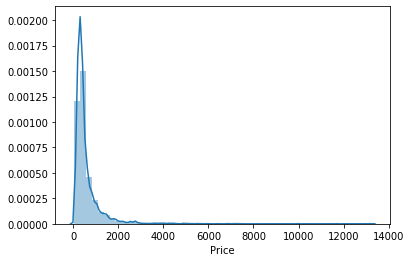

In [41]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

0.4185067270993861 0.9782301714549271


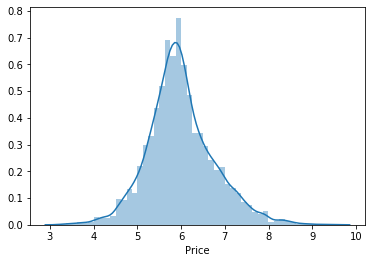

In [42]:
sns.distplot(np.log1p(train_label))
print(np.log1p(train_label).skew(), np.log1p(train_label).kurt())

In [43]:
train_label = train_label.apply(lambda x: np.log1p(x))

df = pd.DataFrame(pd.concat([train[c], test[c]], axis = 0), columns =train.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].ftype == 'category:dense' :
        df[c] = le.fit_transform(pd.concat([train[c], test[c]], axis = 0))
    else :
        df[c] = pd.concat([train[c], test[c]], axis = 0)

In [44]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6228, 852) (1560, 852)


In [45]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [46]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [47]:
train.shape, test.shape

((6228, 852), (1560, 852))

# ML

In [48]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [49]:
score = cross_val_score(xgb.XGBRegressor(), train, train_label, scoring='neg_mean_squared_error', cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:48:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:48:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:48:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
score

array([-0.32770779, -0.31471521, -0.35376909])

In [51]:
param_xgb = {}
param_xgb['learning_rate'] = 0.06
param_xgb['seed'] = 557
param_xgb['eval_metric'] = 'rmse'
param_xgb['objective'] = 'reg:linear'

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.01
param_lgb['seed'] = 449
param_lgb['metric'] = 'rmse'

def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=999)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(xtest, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(testset, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [52]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:49:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.21746	test-rmse:5.2189
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.91001	test-rmse:4.91112
[2]	train-rmse:4.62135	test-rmse:4.62276
[3]	train-rmse:4.35009	test-rmse:4.35121
[4]	train-rmse:4.0954	test-rmse:4.09622
[5]	train-rmse:3.85613	test-rmse:3.85762
[6]	train-rmse:3.6316	test-rmse:3.6332
[7]	train-rmse:3.42069	test-rmse:3.42258
[8]	train-rmse:3.22276	test-rmse:3.22475
[9]	train-rmse:3.03692	test-rmse:3.03889
[10]	train-rmse:2.86263	test-rmse:2.86524
[11]	train-rmse:2.69909	test-rmse:2.70359
[12]	train-rmse:2.54539	test-rmse:2.5509
[13]	train-rmse:2.40141	test-rmse:2.40833
[14]	train-rmse:2.26627	test-rmse:2.27373
[15]	train-rmse:2.13967	test-rmse:2.1484
[16]	train-rmse:2.02094	test-rmse:2.03163
[17]	train-rmse:1.90972	test-rmse:1.92227


[182]	train-rmse:0.305642	test-rmse:0.561495
[183]	train-rmse:0.304914	test-rmse:0.561512
[184]	train-rmse:0.304315	test-rmse:0.561425
[185]	train-rmse:0.303952	test-rmse:0.561383
[186]	train-rmse:0.302952	test-rmse:0.561184
[187]	train-rmse:0.302696	test-rmse:0.561159
[188]	train-rmse:0.302534	test-rmse:0.561037
[189]	train-rmse:0.301991	test-rmse:0.560882
[190]	train-rmse:0.301886	test-rmse:0.56081
[191]	train-rmse:0.301408	test-rmse:0.560856
[192]	train-rmse:0.300764	test-rmse:0.560812
[193]	train-rmse:0.300365	test-rmse:0.560786
[194]	train-rmse:0.300192	test-rmse:0.560759
[195]	train-rmse:0.299099	test-rmse:0.560888
[196]	train-rmse:0.298535	test-rmse:0.560959
[197]	train-rmse:0.297602	test-rmse:0.561026
[198]	train-rmse:0.297315	test-rmse:0.561005
[199]	train-rmse:0.296753	test-rmse:0.560889
[200]	train-rmse:0.296526	test-rmse:0.560828
[201]	train-rmse:0.296103	test-rmse:0.56075
[202]	train-rmse:0.295227	test-rmse:0.560723
[203]	train-rmse:0.294978	test-rmse:0.560783
[204]	train-

[365]	train-rmse:0.229677	test-rmse:0.556254
[366]	train-rmse:0.229584	test-rmse:0.556233
[367]	train-rmse:0.229337	test-rmse:0.556282
[368]	train-rmse:0.228665	test-rmse:0.556253
[369]	train-rmse:0.228569	test-rmse:0.556276
[370]	train-rmse:0.227903	test-rmse:0.556213
[371]	train-rmse:0.22753	test-rmse:0.556185
[372]	train-rmse:0.227073	test-rmse:0.556176
[373]	train-rmse:0.226941	test-rmse:0.55617
[374]	train-rmse:0.226124	test-rmse:0.556262
[375]	train-rmse:0.225837	test-rmse:0.556235
[376]	train-rmse:0.225297	test-rmse:0.556105
[377]	train-rmse:0.22465	test-rmse:0.556065
[378]	train-rmse:0.224384	test-rmse:0.555968
[379]	train-rmse:0.224129	test-rmse:0.55599
[380]	train-rmse:0.223896	test-rmse:0.555998
[381]	train-rmse:0.223465	test-rmse:0.555952
[382]	train-rmse:0.223109	test-rmse:0.555957
[383]	train-rmse:0.222513	test-rmse:0.555959
[384]	train-rmse:0.221751	test-rmse:0.555913
[385]	train-rmse:0.221545	test-rmse:0.555933
[386]	train-rmse:0.221198	test-rmse:0.555808
[387]	train-rm

[548]	train-rmse:0.167056	test-rmse:0.553973
[549]	train-rmse:0.166499	test-rmse:0.553961
[550]	train-rmse:0.166147	test-rmse:0.553943
[551]	train-rmse:0.165986	test-rmse:0.553912
[552]	train-rmse:0.165872	test-rmse:0.553932
[553]	train-rmse:0.165667	test-rmse:0.553945
[554]	train-rmse:0.165538	test-rmse:0.553873
[555]	train-rmse:0.165162	test-rmse:0.553831
[556]	train-rmse:0.164728	test-rmse:0.553838
[557]	train-rmse:0.164485	test-rmse:0.553834
[558]	train-rmse:0.163983	test-rmse:0.553844
[559]	train-rmse:0.163313	test-rmse:0.553737
[560]	train-rmse:0.163169	test-rmse:0.55374
[561]	train-rmse:0.162881	test-rmse:0.553727
[562]	train-rmse:0.162509	test-rmse:0.553669
[563]	train-rmse:0.162434	test-rmse:0.5537
[564]	train-rmse:0.162143	test-rmse:0.553634
[565]	train-rmse:0.161934	test-rmse:0.553616
[566]	train-rmse:0.161543	test-rmse:0.553656
[567]	train-rmse:0.161286	test-rmse:0.553617
[568]	train-rmse:0.160834	test-rmse:0.553605
[569]	train-rmse:0.160282	test-rmse:0.553611
[570]	train-r

[731]	train-rmse:0.116953	test-rmse:0.553106
[732]	train-rmse:0.116666	test-rmse:0.553078
[733]	train-rmse:0.116362	test-rmse:0.553129
[734]	train-rmse:0.115965	test-rmse:0.553141
[735]	train-rmse:0.115867	test-rmse:0.553164
[736]	train-rmse:0.115807	test-rmse:0.553164
[737]	train-rmse:0.115751	test-rmse:0.553193
[738]	train-rmse:0.115418	test-rmse:0.553153
[739]	train-rmse:0.115257	test-rmse:0.553196
[740]	train-rmse:0.115094	test-rmse:0.553177
[741]	train-rmse:0.114825	test-rmse:0.553193
[742]	train-rmse:0.114681	test-rmse:0.553176
[743]	train-rmse:0.113858	test-rmse:0.553097
[744]	train-rmse:0.113747	test-rmse:0.553099
[745]	train-rmse:0.113656	test-rmse:0.5531
[746]	train-rmse:0.113444	test-rmse:0.553086
[747]	train-rmse:0.113322	test-rmse:0.553055
[748]	train-rmse:0.113267	test-rmse:0.553064
[749]	train-rmse:0.113009	test-rmse:0.55308
[750]	train-rmse:0.112823	test-rmse:0.553072
[751]	train-rmse:0.112671	test-rmse:0.553083
[752]	train-rmse:0.112631	test-rmse:0.553085
[753]	train-r

[914]	train-rmse:0.086362	test-rmse:0.552657
[915]	train-rmse:0.086292	test-rmse:0.552665
[916]	train-rmse:0.086279	test-rmse:0.552666
[917]	train-rmse:0.08608	test-rmse:0.5527
[918]	train-rmse:0.085994	test-rmse:0.552711
[919]	train-rmse:0.085954	test-rmse:0.552722
[920]	train-rmse:0.085943	test-rmse:0.552721
[921]	train-rmse:0.085878	test-rmse:0.552711
[922]	train-rmse:0.085808	test-rmse:0.55272
[923]	train-rmse:0.085785	test-rmse:0.552731
[924]	train-rmse:0.085515	test-rmse:0.552739
[925]	train-rmse:0.085476	test-rmse:0.552731
[926]	train-rmse:0.085264	test-rmse:0.552738
[927]	train-rmse:0.085098	test-rmse:0.552733
[928]	train-rmse:0.08504	test-rmse:0.552738
[929]	train-rmse:0.084976	test-rmse:0.552764
[930]	train-rmse:0.084957	test-rmse:0.552768
[931]	train-rmse:0.084811	test-rmse:0.552746
[932]	train-rmse:0.084766	test-rmse:0.55273
[933]	train-rmse:0.084732	test-rmse:0.55273
[934]	train-rmse:0.084665	test-rmse:0.55271
[935]	train-rmse:0.084386	test-rmse:0.552667
[936]	train-rmse:0

[1096]	train-rmse:0.066641	test-rmse:0.552846
[1097]	train-rmse:0.066625	test-rmse:0.55285
Stopping. Best iteration:
[897]	train-rmse:0.088834	test-rmse:0.552477

[01:53:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.21774	test-rmse:5.21818
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.91047	test-rmse:4.91078
[2]	train-rmse:4.62189	test-rmse:4.62203
[3]	train-rmse:4.35097	test-rmse:4.35099
[4]	train-rmse:4.0964	test-rmse:4.09609
[5]	train-rmse:3.85733	test-rmse:3.8571
[6]	train-rmse:3.633	test-rmse:3.63334
[7]	train-rmse:3.42226	test-rmse:3.42361
[8]	train-rmse:3.22456	test-rmse:3.22582
[9]	train-rmse:3.03891	test-rmse:3.03995
[10]	train-rmse:2.86462	test-rmse:2.86562
[11]	train-rmse:2.70107	test-rmse:2.70216
[12]	train-rmse:2.54766	test-rmse:2.54944
[13]	train-rmse:2.40373	test-rmse:2.40573
[14

[178]	train-rmse:0.300272	test-rmse:0.544536
[179]	train-rmse:0.29988	test-rmse:0.544505
[180]	train-rmse:0.299541	test-rmse:0.544513
[181]	train-rmse:0.298807	test-rmse:0.544624
[182]	train-rmse:0.298692	test-rmse:0.544629
[183]	train-rmse:0.298367	test-rmse:0.544648
[184]	train-rmse:0.297492	test-rmse:0.544517
[185]	train-rmse:0.296842	test-rmse:0.544382
[186]	train-rmse:0.29631	test-rmse:0.544196
[187]	train-rmse:0.295988	test-rmse:0.544103
[188]	train-rmse:0.294799	test-rmse:0.544177
[189]	train-rmse:0.294685	test-rmse:0.544137
[190]	train-rmse:0.29389	test-rmse:0.544075
[191]	train-rmse:0.2937	test-rmse:0.544086
[192]	train-rmse:0.293212	test-rmse:0.544097
[193]	train-rmse:0.293074	test-rmse:0.544018
[194]	train-rmse:0.292474	test-rmse:0.543805
[195]	train-rmse:0.29193	test-rmse:0.543727
[196]	train-rmse:0.291644	test-rmse:0.543818
[197]	train-rmse:0.29127	test-rmse:0.543728
[198]	train-rmse:0.290128	test-rmse:0.543674
[199]	train-rmse:0.289465	test-rmse:0.543734
[200]	train-rmse:

[361]	train-rmse:0.220644	test-rmse:0.538684
[362]	train-rmse:0.219931	test-rmse:0.538591
[363]	train-rmse:0.219664	test-rmse:0.538644
[364]	train-rmse:0.219394	test-rmse:0.538734
[365]	train-rmse:0.219093	test-rmse:0.538758
[366]	train-rmse:0.219035	test-rmse:0.538729
[367]	train-rmse:0.218553	test-rmse:0.538643
[368]	train-rmse:0.217833	test-rmse:0.538712
[369]	train-rmse:0.217456	test-rmse:0.538596
[370]	train-rmse:0.217292	test-rmse:0.538518
[371]	train-rmse:0.216951	test-rmse:0.538591
[372]	train-rmse:0.216655	test-rmse:0.538559
[373]	train-rmse:0.215883	test-rmse:0.538633
[374]	train-rmse:0.215549	test-rmse:0.538562
[375]	train-rmse:0.215221	test-rmse:0.538517
[376]	train-rmse:0.215098	test-rmse:0.538446
[377]	train-rmse:0.214945	test-rmse:0.538443
[378]	train-rmse:0.214712	test-rmse:0.538439
[379]	train-rmse:0.214248	test-rmse:0.538443
[380]	train-rmse:0.213992	test-rmse:0.538455
[381]	train-rmse:0.213476	test-rmse:0.538483
[382]	train-rmse:0.213101	test-rmse:0.538427
[383]	trai

[545]	train-rmse:0.167765	test-rmse:0.536981
[546]	train-rmse:0.167409	test-rmse:0.536951
[547]	train-rmse:0.167295	test-rmse:0.536977
[548]	train-rmse:0.167151	test-rmse:0.536962
[549]	train-rmse:0.16704	test-rmse:0.536922
[550]	train-rmse:0.166793	test-rmse:0.53696
[551]	train-rmse:0.166483	test-rmse:0.536983
[552]	train-rmse:0.166194	test-rmse:0.537021
[553]	train-rmse:0.165991	test-rmse:0.53706
[554]	train-rmse:0.165816	test-rmse:0.537085
[555]	train-rmse:0.165608	test-rmse:0.537034
[556]	train-rmse:0.165324	test-rmse:0.536961
[557]	train-rmse:0.165011	test-rmse:0.536936
[558]	train-rmse:0.164721	test-rmse:0.536891
[559]	train-rmse:0.164534	test-rmse:0.536854
[560]	train-rmse:0.163909	test-rmse:0.536857
[561]	train-rmse:0.16363	test-rmse:0.53674
[562]	train-rmse:0.163332	test-rmse:0.536722
[563]	train-rmse:0.162703	test-rmse:0.536779
[564]	train-rmse:0.162674	test-rmse:0.536784
[565]	train-rmse:0.162463	test-rmse:0.536803
[566]	train-rmse:0.162374	test-rmse:0.536801
[567]	train-rms

[729]	train-rmse:0.125871	test-rmse:0.536814
[730]	train-rmse:0.12581	test-rmse:0.536811
[731]	train-rmse:0.125536	test-rmse:0.536817
[732]	train-rmse:0.125344	test-rmse:0.536835
[733]	train-rmse:0.125193	test-rmse:0.536816
[734]	train-rmse:0.124876	test-rmse:0.53683
[735]	train-rmse:0.124674	test-rmse:0.536796
[736]	train-rmse:0.124292	test-rmse:0.536729
[737]	train-rmse:0.124176	test-rmse:0.536768
[738]	train-rmse:0.123741	test-rmse:0.536724
[739]	train-rmse:0.122838	test-rmse:0.536792
[740]	train-rmse:0.122403	test-rmse:0.536804
[741]	train-rmse:0.122183	test-rmse:0.536876
[742]	train-rmse:0.121987	test-rmse:0.536861
[743]	train-rmse:0.121809	test-rmse:0.536871
[744]	train-rmse:0.121711	test-rmse:0.536862
[745]	train-rmse:0.121566	test-rmse:0.536862
[746]	train-rmse:0.121401	test-rmse:0.536849
[747]	train-rmse:0.121263	test-rmse:0.536862
[748]	train-rmse:0.12106	test-rmse:0.536844
[749]	train-rmse:0.120526	test-rmse:0.536844
[750]	train-rmse:0.120477	test-rmse:0.536838
[751]	train-r

[912]	train-rmse:0.090368	test-rmse:0.537439
[913]	train-rmse:0.090185	test-rmse:0.537467
[914]	train-rmse:0.090069	test-rmse:0.537463
[915]	train-rmse:0.089996	test-rmse:0.537454
[916]	train-rmse:0.089694	test-rmse:0.537473
[917]	train-rmse:0.089651	test-rmse:0.537467
[918]	train-rmse:0.089606	test-rmse:0.537481
[919]	train-rmse:0.089475	test-rmse:0.537496
[920]	train-rmse:0.089294	test-rmse:0.537428
[921]	train-rmse:0.089124	test-rmse:0.537458
[922]	train-rmse:0.089083	test-rmse:0.537468
[923]	train-rmse:0.088993	test-rmse:0.537495
[924]	train-rmse:0.088836	test-rmse:0.537528
[925]	train-rmse:0.088718	test-rmse:0.53756
[926]	train-rmse:0.088621	test-rmse:0.537563
[927]	train-rmse:0.088559	test-rmse:0.537565
[928]	train-rmse:0.088387	test-rmse:0.537557
[929]	train-rmse:0.088348	test-rmse:0.537559
[930]	train-rmse:0.088291	test-rmse:0.537543
[931]	train-rmse:0.088251	test-rmse:0.537544
[932]	train-rmse:0.088176	test-rmse:0.537565
[933]	train-rmse:0.088153	test-rmse:0.537568
[934]	train

[123]	train-rmse:0.349951	test-rmse:0.550538
[124]	train-rmse:0.348938	test-rmse:0.550125
[125]	train-rmse:0.348667	test-rmse:0.549959
[126]	train-rmse:0.348109	test-rmse:0.549899
[127]	train-rmse:0.346684	test-rmse:0.549783
[128]	train-rmse:0.34569	test-rmse:0.549453
[129]	train-rmse:0.345129	test-rmse:0.549301
[130]	train-rmse:0.344793	test-rmse:0.549203
[131]	train-rmse:0.344534	test-rmse:0.549022
[132]	train-rmse:0.344105	test-rmse:0.548944
[133]	train-rmse:0.343182	test-rmse:0.548636
[134]	train-rmse:0.342403	test-rmse:0.548609
[135]	train-rmse:0.341591	test-rmse:0.548411
[136]	train-rmse:0.341393	test-rmse:0.548269
[137]	train-rmse:0.340607	test-rmse:0.548309
[138]	train-rmse:0.338757	test-rmse:0.54837
[139]	train-rmse:0.337967	test-rmse:0.548116
[140]	train-rmse:0.337726	test-rmse:0.547956
[141]	train-rmse:0.33736	test-rmse:0.547828
[142]	train-rmse:0.336168	test-rmse:0.547741
[143]	train-rmse:0.335779	test-rmse:0.54778
[144]	train-rmse:0.335278	test-rmse:0.547601
[145]	train-rm

[306]	train-rmse:0.243878	test-rmse:0.540174
[307]	train-rmse:0.243666	test-rmse:0.540164
[308]	train-rmse:0.24348	test-rmse:0.540153
[309]	train-rmse:0.243382	test-rmse:0.540155
[310]	train-rmse:0.242893	test-rmse:0.540101
[311]	train-rmse:0.241997	test-rmse:0.540203
[312]	train-rmse:0.241386	test-rmse:0.540078
[313]	train-rmse:0.24123	test-rmse:0.539909
[314]	train-rmse:0.241101	test-rmse:0.539885
[315]	train-rmse:0.240579	test-rmse:0.539855
[316]	train-rmse:0.240326	test-rmse:0.539864
[317]	train-rmse:0.239798	test-rmse:0.539841
[318]	train-rmse:0.239562	test-rmse:0.53976
[319]	train-rmse:0.238537	test-rmse:0.539695
[320]	train-rmse:0.238338	test-rmse:0.539587
[321]	train-rmse:0.238236	test-rmse:0.539597
[322]	train-rmse:0.238169	test-rmse:0.539587
[323]	train-rmse:0.237728	test-rmse:0.539619
[324]	train-rmse:0.237085	test-rmse:0.539602
[325]	train-rmse:0.236754	test-rmse:0.539672
[326]	train-rmse:0.236521	test-rmse:0.539722
[327]	train-rmse:0.236039	test-rmse:0.539651
[328]	train-r

[489]	train-rmse:0.181561	test-rmse:0.539516
[490]	train-rmse:0.181336	test-rmse:0.539522
[491]	train-rmse:0.181199	test-rmse:0.53948
[492]	train-rmse:0.181135	test-rmse:0.539482
[493]	train-rmse:0.180973	test-rmse:0.539454
[494]	train-rmse:0.180874	test-rmse:0.539463
[495]	train-rmse:0.180832	test-rmse:0.539446
[496]	train-rmse:0.180711	test-rmse:0.539413
[497]	train-rmse:0.180646	test-rmse:0.53941
[498]	train-rmse:0.180479	test-rmse:0.539412
[499]	train-rmse:0.180301	test-rmse:0.539416
[500]	train-rmse:0.179962	test-rmse:0.539377
[501]	train-rmse:0.179755	test-rmse:0.53938
[502]	train-rmse:0.179626	test-rmse:0.539366
[503]	train-rmse:0.17944	test-rmse:0.539407
[504]	train-rmse:0.179271	test-rmse:0.53941
[505]	train-rmse:0.179	test-rmse:0.539469
[506]	train-rmse:0.178776	test-rmse:0.539488
[507]	train-rmse:0.178577	test-rmse:0.539559
[508]	train-rmse:0.178315	test-rmse:0.539556
[509]	train-rmse:0.178279	test-rmse:0.539548
[510]	train-rmse:0.177973	test-rmse:0.539564
[511]	train-rmse:0

[672]	train-rmse:0.141089	test-rmse:0.538771
[673]	train-rmse:0.140687	test-rmse:0.538778
[674]	train-rmse:0.140455	test-rmse:0.538726
[675]	train-rmse:0.140204	test-rmse:0.538718
[676]	train-rmse:0.140064	test-rmse:0.53874
[677]	train-rmse:0.13963	test-rmse:0.538695
[678]	train-rmse:0.13948	test-rmse:0.538679
[679]	train-rmse:0.139028	test-rmse:0.538661
[680]	train-rmse:0.138868	test-rmse:0.538695
[681]	train-rmse:0.138423	test-rmse:0.538756
[682]	train-rmse:0.137972	test-rmse:0.538677
[683]	train-rmse:0.137819	test-rmse:0.538623
[684]	train-rmse:0.137725	test-rmse:0.538621
[685]	train-rmse:0.13756	test-rmse:0.538674
[686]	train-rmse:0.137259	test-rmse:0.538674
[687]	train-rmse:0.137203	test-rmse:0.538668
[688]	train-rmse:0.137095	test-rmse:0.53866
[689]	train-rmse:0.13706	test-rmse:0.538656
[690]	train-rmse:0.136595	test-rmse:0.538566
[691]	train-rmse:0.136463	test-rmse:0.538549
[692]	train-rmse:0.136271	test-rmse:0.538509
[693]	train-rmse:0.136248	test-rmse:0.538511
[694]	train-rmse

[855]	train-rmse:0.107692	test-rmse:0.539336
[856]	train-rmse:0.107606	test-rmse:0.539321
[857]	train-rmse:0.10754	test-rmse:0.53933
[858]	train-rmse:0.107501	test-rmse:0.539323
[859]	train-rmse:0.107359	test-rmse:0.539332
[860]	train-rmse:0.107276	test-rmse:0.539354
[861]	train-rmse:0.107218	test-rmse:0.539356
[862]	train-rmse:0.107118	test-rmse:0.539354
[863]	train-rmse:0.106983	test-rmse:0.539342
[864]	train-rmse:0.106835	test-rmse:0.539364
[865]	train-rmse:0.106776	test-rmse:0.539374
[866]	train-rmse:0.106664	test-rmse:0.5394
[867]	train-rmse:0.10664	test-rmse:0.539404
[868]	train-rmse:0.106528	test-rmse:0.539419
[869]	train-rmse:0.10638	test-rmse:0.539432
[870]	train-rmse:0.106272	test-rmse:0.539404
[871]	train-rmse:0.106233	test-rmse:0.539406
[872]	train-rmse:0.105969	test-rmse:0.539374
[873]	train-rmse:0.105881	test-rmse:0.539386
[874]	train-rmse:0.105769	test-rmse:0.539404
[875]	train-rmse:0.105631	test-rmse:0.539437
[876]	train-rmse:0.105603	test-rmse:0.539438
[877]	train-rmse

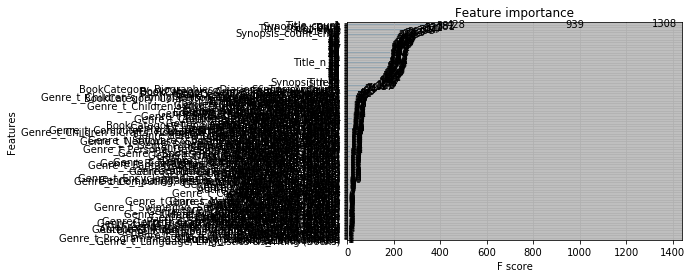

In [53]:
xgb.plot_importance(model)

In [54]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.748141	valid_1's rmse: 0.781155
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.745309	valid_1's rmse: 0.77872
[3]	training's rmse: 0.742525	valid_1's rmse: 0.776247
[4]	training's rmse: 0.739779	valid_1's rmse: 0.773897
[5]	training's rmse: 0.737082	valid_1's rmse: 0.771536
[6]	training's rmse: 0.734416	valid_1's rmse: 0.769197
[7]	training's rmse: 0.73181	valid_1's rmse: 0.766975
[8]	training's rmse: 0.729215	valid_1's rmse: 0.764709
[9]	training's rmse: 0.726857	valid_1's rmse: 0.762759
[10]	training's rmse: 0.724358	valid_1's rmse: 0.760625
[11]	training's rmse: 0.722076	valid_1's rmse: 0.758761
[12]	training's rmse: 0.719806	valid_1's rmse: 0.75698
[13]	training's rmse: 0.717367	valid_1's rmse: 0.754886
[14]	training's rmse: 0.715172	valid_1's rmse: 0.753168
[15]	training's rmse: 0.713002	valid_1's rmse: 0.751513
[16]	training's rmse: 0.710693	valid_1's rmse: 0.74959
[17]	training's rmse: 0.708589	valid_1's rmse: 0.74795

[145]	training's rmse: 0.544106	valid_1's rmse: 0.630966
[146]	training's rmse: 0.543251	valid_1's rmse: 0.63049
[147]	training's rmse: 0.542491	valid_1's rmse: 0.630094
[148]	training's rmse: 0.541628	valid_1's rmse: 0.629639
[149]	training's rmse: 0.540887	valid_1's rmse: 0.629293
[150]	training's rmse: 0.54004	valid_1's rmse: 0.628802
[151]	training's rmse: 0.539299	valid_1's rmse: 0.628355
[152]	training's rmse: 0.538487	valid_1's rmse: 0.627921
[153]	training's rmse: 0.537752	valid_1's rmse: 0.627537
[154]	training's rmse: 0.536913	valid_1's rmse: 0.627082
[155]	training's rmse: 0.536201	valid_1's rmse: 0.626693
[156]	training's rmse: 0.535381	valid_1's rmse: 0.626294
[157]	training's rmse: 0.534677	valid_1's rmse: 0.625958
[158]	training's rmse: 0.533869	valid_1's rmse: 0.625484
[159]	training's rmse: 0.533066	valid_1's rmse: 0.625027
[160]	training's rmse: 0.53236	valid_1's rmse: 0.624694
[161]	training's rmse: 0.531586	valid_1's rmse: 0.624228
[162]	training's rmse: 0.530915	va

[291]	training's rmse: 0.455223	valid_1's rmse: 0.592442
[292]	training's rmse: 0.454729	valid_1's rmse: 0.592219
[293]	training's rmse: 0.45425	valid_1's rmse: 0.592032
[294]	training's rmse: 0.453785	valid_1's rmse: 0.59186
[295]	training's rmse: 0.4533	valid_1's rmse: 0.591749
[296]	training's rmse: 0.452849	valid_1's rmse: 0.591614
[297]	training's rmse: 0.452369	valid_1's rmse: 0.59154
[298]	training's rmse: 0.45189	valid_1's rmse: 0.591341
[299]	training's rmse: 0.451426	valid_1's rmse: 0.591241
[300]	training's rmse: 0.450965	valid_1's rmse: 0.591135
[301]	training's rmse: 0.450474	valid_1's rmse: 0.590966
[302]	training's rmse: 0.450009	valid_1's rmse: 0.590814
[303]	training's rmse: 0.44952	valid_1's rmse: 0.590673
[304]	training's rmse: 0.449042	valid_1's rmse: 0.590534
[305]	training's rmse: 0.448574	valid_1's rmse: 0.590399
[306]	training's rmse: 0.448097	valid_1's rmse: 0.590278
[307]	training's rmse: 0.447659	valid_1's rmse: 0.590106
[308]	training's rmse: 0.447185	valid_

[436]	training's rmse: 0.395696	valid_1's rmse: 0.576615
[437]	training's rmse: 0.395323	valid_1's rmse: 0.576534
[438]	training's rmse: 0.394978	valid_1's rmse: 0.576498
[439]	training's rmse: 0.394595	valid_1's rmse: 0.576412
[440]	training's rmse: 0.394278	valid_1's rmse: 0.576286
[441]	training's rmse: 0.393907	valid_1's rmse: 0.576244
[442]	training's rmse: 0.393535	valid_1's rmse: 0.57618
[443]	training's rmse: 0.393227	valid_1's rmse: 0.576111
[444]	training's rmse: 0.392846	valid_1's rmse: 0.576087
[445]	training's rmse: 0.392485	valid_1's rmse: 0.576017
[446]	training's rmse: 0.392155	valid_1's rmse: 0.575957
[447]	training's rmse: 0.391842	valid_1's rmse: 0.575878
[448]	training's rmse: 0.391497	valid_1's rmse: 0.57583
[449]	training's rmse: 0.391152	valid_1's rmse: 0.575791
[450]	training's rmse: 0.390837	valid_1's rmse: 0.575661
[451]	training's rmse: 0.390479	valid_1's rmse: 0.575613
[452]	training's rmse: 0.390176	valid_1's rmse: 0.57554
[453]	training's rmse: 0.389817	va

[583]	training's rmse: 0.350586	valid_1's rmse: 0.568426
[584]	training's rmse: 0.350335	valid_1's rmse: 0.56837
[585]	training's rmse: 0.350081	valid_1's rmse: 0.568306
[586]	training's rmse: 0.34978	valid_1's rmse: 0.568216
[587]	training's rmse: 0.349516	valid_1's rmse: 0.568206
[588]	training's rmse: 0.349269	valid_1's rmse: 0.568149
[589]	training's rmse: 0.349042	valid_1's rmse: 0.568086
[590]	training's rmse: 0.348792	valid_1's rmse: 0.56805
[591]	training's rmse: 0.348523	valid_1's rmse: 0.56802
[592]	training's rmse: 0.348297	valid_1's rmse: 0.567984
[593]	training's rmse: 0.348053	valid_1's rmse: 0.56798
[594]	training's rmse: 0.347794	valid_1's rmse: 0.567927
[595]	training's rmse: 0.347504	valid_1's rmse: 0.567895
[596]	training's rmse: 0.347253	valid_1's rmse: 0.56787
[597]	training's rmse: 0.347013	valid_1's rmse: 0.567819
[598]	training's rmse: 0.346757	valid_1's rmse: 0.567795
[599]	training's rmse: 0.346491	valid_1's rmse: 0.567757
[600]	training's rmse: 0.346199	valid

[729]	training's rmse: 0.316261	valid_1's rmse: 0.564106
[730]	training's rmse: 0.316027	valid_1's rmse: 0.564065
[731]	training's rmse: 0.315823	valid_1's rmse: 0.564032
[732]	training's rmse: 0.315624	valid_1's rmse: 0.564012
[733]	training's rmse: 0.315443	valid_1's rmse: 0.563988
[734]	training's rmse: 0.315259	valid_1's rmse: 0.563966
[735]	training's rmse: 0.314986	valid_1's rmse: 0.563929
[736]	training's rmse: 0.314769	valid_1's rmse: 0.56388
[737]	training's rmse: 0.314551	valid_1's rmse: 0.563872
[738]	training's rmse: 0.314352	valid_1's rmse: 0.563858
[739]	training's rmse: 0.314129	valid_1's rmse: 0.563858
[740]	training's rmse: 0.313857	valid_1's rmse: 0.563841
[741]	training's rmse: 0.313677	valid_1's rmse: 0.5638
[742]	training's rmse: 0.313483	valid_1's rmse: 0.563761
[743]	training's rmse: 0.313286	valid_1's rmse: 0.563744
[744]	training's rmse: 0.313068	valid_1's rmse: 0.563749
[745]	training's rmse: 0.312826	valid_1's rmse: 0.563687
[746]	training's rmse: 0.312629	va

[875]	training's rmse: 0.28741	valid_1's rmse: 0.560963
[876]	training's rmse: 0.287199	valid_1's rmse: 0.56092
[877]	training's rmse: 0.286971	valid_1's rmse: 0.560904
[878]	training's rmse: 0.286783	valid_1's rmse: 0.56091
[879]	training's rmse: 0.286621	valid_1's rmse: 0.56088
[880]	training's rmse: 0.286419	valid_1's rmse: 0.56084
[881]	training's rmse: 0.286221	valid_1's rmse: 0.560805
[882]	training's rmse: 0.286002	valid_1's rmse: 0.560801
[883]	training's rmse: 0.285785	valid_1's rmse: 0.560784
[884]	training's rmse: 0.28559	valid_1's rmse: 0.560792
[885]	training's rmse: 0.285398	valid_1's rmse: 0.560756
[886]	training's rmse: 0.285206	valid_1's rmse: 0.560757
[887]	training's rmse: 0.285023	valid_1's rmse: 0.560756
[888]	training's rmse: 0.284818	valid_1's rmse: 0.560691
[889]	training's rmse: 0.28462	valid_1's rmse: 0.560678
[890]	training's rmse: 0.284462	valid_1's rmse: 0.560654
[891]	training's rmse: 0.284274	valid_1's rmse: 0.560615
[892]	training's rmse: 0.28413	valid_1

[1025]	training's rmse: 0.261183	valid_1's rmse: 0.558747
[1026]	training's rmse: 0.260994	valid_1's rmse: 0.558735
[1027]	training's rmse: 0.260807	valid_1's rmse: 0.558727
[1028]	training's rmse: 0.260657	valid_1's rmse: 0.558717
[1029]	training's rmse: 0.260486	valid_1's rmse: 0.558698
[1030]	training's rmse: 0.260338	valid_1's rmse: 0.558689
[1031]	training's rmse: 0.260203	valid_1's rmse: 0.558687
[1032]	training's rmse: 0.260016	valid_1's rmse: 0.55866
[1033]	training's rmse: 0.25985	valid_1's rmse: 0.55863
[1034]	training's rmse: 0.259678	valid_1's rmse: 0.558627
[1035]	training's rmse: 0.259489	valid_1's rmse: 0.558604
[1036]	training's rmse: 0.25929	valid_1's rmse: 0.558568
[1037]	training's rmse: 0.259163	valid_1's rmse: 0.558549
[1038]	training's rmse: 0.259028	valid_1's rmse: 0.558527
[1039]	training's rmse: 0.258871	valid_1's rmse: 0.558532
[1040]	training's rmse: 0.258707	valid_1's rmse: 0.558536
[1041]	training's rmse: 0.258505	valid_1's rmse: 0.558516
[1042]	training's 

[1172]	training's rmse: 0.238638	valid_1's rmse: 0.556855
[1173]	training's rmse: 0.238484	valid_1's rmse: 0.556869
[1174]	training's rmse: 0.23829	valid_1's rmse: 0.556861
[1175]	training's rmse: 0.238147	valid_1's rmse: 0.556851
[1176]	training's rmse: 0.237952	valid_1's rmse: 0.556855
[1177]	training's rmse: 0.237812	valid_1's rmse: 0.556847
[1178]	training's rmse: 0.23763	valid_1's rmse: 0.556846
[1179]	training's rmse: 0.237499	valid_1's rmse: 0.55684
[1180]	training's rmse: 0.237364	valid_1's rmse: 0.556817
[1181]	training's rmse: 0.237216	valid_1's rmse: 0.556812
[1182]	training's rmse: 0.237096	valid_1's rmse: 0.556816
[1183]	training's rmse: 0.236949	valid_1's rmse: 0.556806
[1184]	training's rmse: 0.236788	valid_1's rmse: 0.556785
[1185]	training's rmse: 0.236667	valid_1's rmse: 0.556774
[1186]	training's rmse: 0.236504	valid_1's rmse: 0.55677
[1187]	training's rmse: 0.236384	valid_1's rmse: 0.556747
[1188]	training's rmse: 0.236253	valid_1's rmse: 0.556729
[1189]	training's 

[1321]	training's rmse: 0.218192	valid_1's rmse: 0.555369
[1322]	training's rmse: 0.218024	valid_1's rmse: 0.555318
[1323]	training's rmse: 0.217888	valid_1's rmse: 0.55531
[1324]	training's rmse: 0.2177	valid_1's rmse: 0.555289
[1325]	training's rmse: 0.217538	valid_1's rmse: 0.555297
[1326]	training's rmse: 0.217417	valid_1's rmse: 0.555271
[1327]	training's rmse: 0.217289	valid_1's rmse: 0.555231
[1328]	training's rmse: 0.217147	valid_1's rmse: 0.555207
[1329]	training's rmse: 0.217014	valid_1's rmse: 0.555192
[1330]	training's rmse: 0.216861	valid_1's rmse: 0.555197
[1331]	training's rmse: 0.216727	valid_1's rmse: 0.555197
[1332]	training's rmse: 0.216569	valid_1's rmse: 0.5552
[1333]	training's rmse: 0.216442	valid_1's rmse: 0.55521
[1334]	training's rmse: 0.216338	valid_1's rmse: 0.555204
[1335]	training's rmse: 0.216221	valid_1's rmse: 0.555201
[1336]	training's rmse: 0.216084	valid_1's rmse: 0.555201
[1337]	training's rmse: 0.215958	valid_1's rmse: 0.55519
[1338]	training's rms

[1464]	training's rmse: 0.200569	valid_1's rmse: 0.554617
[1465]	training's rmse: 0.200471	valid_1's rmse: 0.554602
[1466]	training's rmse: 0.200341	valid_1's rmse: 0.554596
[1467]	training's rmse: 0.200201	valid_1's rmse: 0.554587
[1468]	training's rmse: 0.200082	valid_1's rmse: 0.554591
[1469]	training's rmse: 0.199976	valid_1's rmse: 0.554582
[1470]	training's rmse: 0.199867	valid_1's rmse: 0.554581
[1471]	training's rmse: 0.199778	valid_1's rmse: 0.554577
[1472]	training's rmse: 0.199667	valid_1's rmse: 0.554564
[1473]	training's rmse: 0.199517	valid_1's rmse: 0.554562
[1474]	training's rmse: 0.199411	valid_1's rmse: 0.554551
[1475]	training's rmse: 0.199251	valid_1's rmse: 0.55454
[1476]	training's rmse: 0.199143	valid_1's rmse: 0.554517
[1477]	training's rmse: 0.199053	valid_1's rmse: 0.554516
[1478]	training's rmse: 0.198925	valid_1's rmse: 0.554522
[1479]	training's rmse: 0.198811	valid_1's rmse: 0.554513
[1480]	training's rmse: 0.198707	valid_1's rmse: 0.554539
[1481]	training

[1608]	training's rmse: 0.185127	valid_1's rmse: 0.553751
[1609]	training's rmse: 0.185036	valid_1's rmse: 0.553753
[1610]	training's rmse: 0.184933	valid_1's rmse: 0.553761
[1611]	training's rmse: 0.18482	valid_1's rmse: 0.553754
[1612]	training's rmse: 0.184716	valid_1's rmse: 0.553726
[1613]	training's rmse: 0.184629	valid_1's rmse: 0.553716
[1614]	training's rmse: 0.184545	valid_1's rmse: 0.553709
[1615]	training's rmse: 0.184436	valid_1's rmse: 0.553695
[1616]	training's rmse: 0.184318	valid_1's rmse: 0.553707
[1617]	training's rmse: 0.184206	valid_1's rmse: 0.553695
[1618]	training's rmse: 0.184108	valid_1's rmse: 0.553681
[1619]	training's rmse: 0.184017	valid_1's rmse: 0.553681
[1620]	training's rmse: 0.183928	valid_1's rmse: 0.553678
[1621]	training's rmse: 0.183823	valid_1's rmse: 0.553682
[1622]	training's rmse: 0.183708	valid_1's rmse: 0.553686
[1623]	training's rmse: 0.183622	valid_1's rmse: 0.553676
[1624]	training's rmse: 0.183512	valid_1's rmse: 0.553653
[1625]	training

[1757]	training's rmse: 0.170974	valid_1's rmse: 0.553189
[1758]	training's rmse: 0.170891	valid_1's rmse: 0.5532
[1759]	training's rmse: 0.170775	valid_1's rmse: 0.553195
[1760]	training's rmse: 0.170679	valid_1's rmse: 0.553197
[1761]	training's rmse: 0.170541	valid_1's rmse: 0.553173
[1762]	training's rmse: 0.170451	valid_1's rmse: 0.553181
[1763]	training's rmse: 0.170384	valid_1's rmse: 0.553179
[1764]	training's rmse: 0.170299	valid_1's rmse: 0.55318
[1765]	training's rmse: 0.17021	valid_1's rmse: 0.553171
[1766]	training's rmse: 0.170085	valid_1's rmse: 0.553154
[1767]	training's rmse: 0.169967	valid_1's rmse: 0.553182
[1768]	training's rmse: 0.169888	valid_1's rmse: 0.553191
[1769]	training's rmse: 0.169751	valid_1's rmse: 0.553163
[1770]	training's rmse: 0.169646	valid_1's rmse: 0.553164
[1771]	training's rmse: 0.16956	valid_1's rmse: 0.553169
[1772]	training's rmse: 0.169466	valid_1's rmse: 0.553168
[1773]	training's rmse: 0.169379	valid_1's rmse: 0.553158
[1774]	training's r

[1902]	training's rmse: 0.158001	valid_1's rmse: 0.55283
[1903]	training's rmse: 0.157932	valid_1's rmse: 0.552827
[1904]	training's rmse: 0.157847	valid_1's rmse: 0.552822
[1905]	training's rmse: 0.157731	valid_1's rmse: 0.55282
[1906]	training's rmse: 0.157643	valid_1's rmse: 0.552828
[1907]	training's rmse: 0.157561	valid_1's rmse: 0.552818
[1908]	training's rmse: 0.157477	valid_1's rmse: 0.552806
[1909]	training's rmse: 0.157385	valid_1's rmse: 0.552817
[1910]	training's rmse: 0.157298	valid_1's rmse: 0.552809
[1911]	training's rmse: 0.157218	valid_1's rmse: 0.552816
[1912]	training's rmse: 0.157119	valid_1's rmse: 0.552806
[1913]	training's rmse: 0.156994	valid_1's rmse: 0.552797
[1914]	training's rmse: 0.156926	valid_1's rmse: 0.552794
[1915]	training's rmse: 0.156845	valid_1's rmse: 0.552789
[1916]	training's rmse: 0.156781	valid_1's rmse: 0.552791
[1917]	training's rmse: 0.156691	valid_1's rmse: 0.552794
[1918]	training's rmse: 0.156607	valid_1's rmse: 0.552786
[1919]	training'

[2048]	training's rmse: 0.145752	valid_1's rmse: 0.552426
[2049]	training's rmse: 0.145684	valid_1's rmse: 0.552426
[2050]	training's rmse: 0.145579	valid_1's rmse: 0.552415
[2051]	training's rmse: 0.145511	valid_1's rmse: 0.552399
[2052]	training's rmse: 0.145423	valid_1's rmse: 0.552396
[2053]	training's rmse: 0.145315	valid_1's rmse: 0.552398
[2054]	training's rmse: 0.145234	valid_1's rmse: 0.552394
[2055]	training's rmse: 0.145138	valid_1's rmse: 0.552397
[2056]	training's rmse: 0.145047	valid_1's rmse: 0.552395
[2057]	training's rmse: 0.144976	valid_1's rmse: 0.552387
[2058]	training's rmse: 0.144889	valid_1's rmse: 0.552386
[2059]	training's rmse: 0.144828	valid_1's rmse: 0.552388
[2060]	training's rmse: 0.144757	valid_1's rmse: 0.552397
[2061]	training's rmse: 0.144662	valid_1's rmse: 0.552388
[2062]	training's rmse: 0.144587	valid_1's rmse: 0.552389
[2063]	training's rmse: 0.144524	valid_1's rmse: 0.552386
[2064]	training's rmse: 0.144444	valid_1's rmse: 0.552401
[2065]	trainin

[2190]	training's rmse: 0.135278	valid_1's rmse: 0.5523
[2191]	training's rmse: 0.135212	valid_1's rmse: 0.552292
[2192]	training's rmse: 0.135151	valid_1's rmse: 0.552282
[2193]	training's rmse: 0.135094	valid_1's rmse: 0.552278
[2194]	training's rmse: 0.13504	valid_1's rmse: 0.552271
[2195]	training's rmse: 0.134972	valid_1's rmse: 0.552278
[2196]	training's rmse: 0.134897	valid_1's rmse: 0.552273
[2197]	training's rmse: 0.13483	valid_1's rmse: 0.552254
[2198]	training's rmse: 0.134766	valid_1's rmse: 0.552239
[2199]	training's rmse: 0.13469	valid_1's rmse: 0.552239
[2200]	training's rmse: 0.134623	valid_1's rmse: 0.552238
[2201]	training's rmse: 0.134572	valid_1's rmse: 0.55223
[2202]	training's rmse: 0.134487	valid_1's rmse: 0.552224
[2203]	training's rmse: 0.134423	valid_1's rmse: 0.552241
[2204]	training's rmse: 0.134359	valid_1's rmse: 0.552252
[2205]	training's rmse: 0.134305	valid_1's rmse: 0.552251
[2206]	training's rmse: 0.134244	valid_1's rmse: 0.552239
[2207]	training's rm

[2335]	training's rmse: 0.125635	valid_1's rmse: 0.552255
[2336]	training's rmse: 0.125584	valid_1's rmse: 0.552258
[2337]	training's rmse: 0.125524	valid_1's rmse: 0.552264
[2338]	training's rmse: 0.125453	valid_1's rmse: 0.55226
[2339]	training's rmse: 0.125403	valid_1's rmse: 0.552256
[2340]	training's rmse: 0.125309	valid_1's rmse: 0.552244
[2341]	training's rmse: 0.125228	valid_1's rmse: 0.552247
[2342]	training's rmse: 0.125149	valid_1's rmse: 0.552246
[2343]	training's rmse: 0.125097	valid_1's rmse: 0.552247
[2344]	training's rmse: 0.125047	valid_1's rmse: 0.552245
[2345]	training's rmse: 0.124984	valid_1's rmse: 0.552244
[2346]	training's rmse: 0.124928	valid_1's rmse: 0.552243
[2347]	training's rmse: 0.124844	valid_1's rmse: 0.552246
[2348]	training's rmse: 0.12476	valid_1's rmse: 0.552243
[2349]	training's rmse: 0.124699	valid_1's rmse: 0.55225
[2350]	training's rmse: 0.124645	valid_1's rmse: 0.55225
[2351]	training's rmse: 0.124546	valid_1's rmse: 0.552241
[2352]	training's 

[2482]	training's rmse: 0.116037	valid_1's rmse: 0.552029
[2483]	training's rmse: 0.115956	valid_1's rmse: 0.552034
[2484]	training's rmse: 0.115875	valid_1's rmse: 0.552042
[2485]	training's rmse: 0.115822	valid_1's rmse: 0.552036
[2486]	training's rmse: 0.11578	valid_1's rmse: 0.552028
[2487]	training's rmse: 0.115729	valid_1's rmse: 0.552022
[2488]	training's rmse: 0.115679	valid_1's rmse: 0.552028
[2489]	training's rmse: 0.115613	valid_1's rmse: 0.552022
[2490]	training's rmse: 0.115544	valid_1's rmse: 0.552027
[2491]	training's rmse: 0.115492	valid_1's rmse: 0.552027
[2492]	training's rmse: 0.11541	valid_1's rmse: 0.552023
[2493]	training's rmse: 0.115361	valid_1's rmse: 0.552022
[2494]	training's rmse: 0.115304	valid_1's rmse: 0.55202
[2495]	training's rmse: 0.115236	valid_1's rmse: 0.552025
[2496]	training's rmse: 0.11516	valid_1's rmse: 0.55203
[2497]	training's rmse: 0.115106	valid_1's rmse: 0.552028
[2498]	training's rmse: 0.115027	valid_1's rmse: 0.552014
[2499]	training's r

[2628]	training's rmse: 0.107702	valid_1's rmse: 0.551914
[2629]	training's rmse: 0.107659	valid_1's rmse: 0.551916
[2630]	training's rmse: 0.107599	valid_1's rmse: 0.551913
[2631]	training's rmse: 0.107565	valid_1's rmse: 0.551919
[2632]	training's rmse: 0.107526	valid_1's rmse: 0.551923
[2633]	training's rmse: 0.107469	valid_1's rmse: 0.551928
[2634]	training's rmse: 0.107433	valid_1's rmse: 0.55192
[2635]	training's rmse: 0.107355	valid_1's rmse: 0.55193
[2636]	training's rmse: 0.107286	valid_1's rmse: 0.551931
[2637]	training's rmse: 0.107225	valid_1's rmse: 0.551932
[2638]	training's rmse: 0.107164	valid_1's rmse: 0.551928
[2639]	training's rmse: 0.107121	valid_1's rmse: 0.551928
[2640]	training's rmse: 0.107082	valid_1's rmse: 0.551925
[2641]	training's rmse: 0.107032	valid_1's rmse: 0.551925
[2642]	training's rmse: 0.106969	valid_1's rmse: 0.55191
[2643]	training's rmse: 0.106917	valid_1's rmse: 0.55192
[2644]	training's rmse: 0.106864	valid_1's rmse: 0.551915
[2645]	training's 

[2772]	training's rmse: 0.10021	valid_1's rmse: 0.551723
[2773]	training's rmse: 0.100154	valid_1's rmse: 0.55172
[2774]	training's rmse: 0.1001	valid_1's rmse: 0.551712
[2775]	training's rmse: 0.100041	valid_1's rmse: 0.551715
[2776]	training's rmse: 0.0999946	valid_1's rmse: 0.551716
[2777]	training's rmse: 0.0999495	valid_1's rmse: 0.551715
[2778]	training's rmse: 0.0998921	valid_1's rmse: 0.551708
[2779]	training's rmse: 0.0998321	valid_1's rmse: 0.551709
[2780]	training's rmse: 0.0997842	valid_1's rmse: 0.551704
[2781]	training's rmse: 0.0997146	valid_1's rmse: 0.551711
[2782]	training's rmse: 0.0996685	valid_1's rmse: 0.551709
[2783]	training's rmse: 0.0996201	valid_1's rmse: 0.551706
[2784]	training's rmse: 0.0995874	valid_1's rmse: 0.551697
[2785]	training's rmse: 0.099543	valid_1's rmse: 0.551687
[2786]	training's rmse: 0.0995139	valid_1's rmse: 0.551684
[2787]	training's rmse: 0.0994696	valid_1's rmse: 0.551677
[2788]	training's rmse: 0.0994177	valid_1's rmse: 0.551677
[2789]

[2911]	training's rmse: 0.0936661	valid_1's rmse: 0.551792
[2912]	training's rmse: 0.0936173	valid_1's rmse: 0.55179
[2913]	training's rmse: 0.0935569	valid_1's rmse: 0.551797
[2914]	training's rmse: 0.0935041	valid_1's rmse: 0.551795
[2915]	training's rmse: 0.093461	valid_1's rmse: 0.551791
[2916]	training's rmse: 0.09342	valid_1's rmse: 0.551788
[2917]	training's rmse: 0.0933898	valid_1's rmse: 0.551786
[2918]	training's rmse: 0.0933323	valid_1's rmse: 0.551789
[2919]	training's rmse: 0.0932827	valid_1's rmse: 0.551783
[2920]	training's rmse: 0.0932153	valid_1's rmse: 0.551778
[2921]	training's rmse: 0.0931606	valid_1's rmse: 0.551768
[2922]	training's rmse: 0.0931012	valid_1's rmse: 0.551773
[2923]	training's rmse: 0.0930719	valid_1's rmse: 0.551771
[2924]	training's rmse: 0.0930055	valid_1's rmse: 0.551771
[2925]	training's rmse: 0.0929571	valid_1's rmse: 0.551768
[2926]	training's rmse: 0.0929271	valid_1's rmse: 0.551768
[2927]	training's rmse: 0.0928916	valid_1's rmse: 0.551765
[

[61]	training's rmse: 0.646655	valid_1's rmse: 0.646253
[62]	training's rmse: 0.645143	valid_1's rmse: 0.645336
[63]	training's rmse: 0.643749	valid_1's rmse: 0.64468
[64]	training's rmse: 0.64229	valid_1's rmse: 0.643763
[65]	training's rmse: 0.640929	valid_1's rmse: 0.643118
[66]	training's rmse: 0.639491	valid_1's rmse: 0.642219
[67]	training's rmse: 0.638068	valid_1's rmse: 0.641526
[68]	training's rmse: 0.636673	valid_1's rmse: 0.640716
[69]	training's rmse: 0.635279	valid_1's rmse: 0.639953
[70]	training's rmse: 0.63398	valid_1's rmse: 0.639337
[71]	training's rmse: 0.632565	valid_1's rmse: 0.638544
[72]	training's rmse: 0.631179	valid_1's rmse: 0.637795
[73]	training's rmse: 0.629826	valid_1's rmse: 0.637013
[74]	training's rmse: 0.62852	valid_1's rmse: 0.636312
[75]	training's rmse: 0.627186	valid_1's rmse: 0.635517
[76]	training's rmse: 0.625864	valid_1's rmse: 0.63486
[77]	training's rmse: 0.62456	valid_1's rmse: 0.633968
[78]	training's rmse: 0.623252	valid_1's rmse: 0.63326

[206]	training's rmse: 0.507968	valid_1's rmse: 0.582965
[207]	training's rmse: 0.507298	valid_1's rmse: 0.582725
[208]	training's rmse: 0.506593	valid_1's rmse: 0.582479
[209]	training's rmse: 0.505949	valid_1's rmse: 0.582321
[210]	training's rmse: 0.505276	valid_1's rmse: 0.582098
[211]	training's rmse: 0.504612	valid_1's rmse: 0.581889
[212]	training's rmse: 0.504022	valid_1's rmse: 0.581783
[213]	training's rmse: 0.503373	valid_1's rmse: 0.581528
[214]	training's rmse: 0.502707	valid_1's rmse: 0.581245
[215]	training's rmse: 0.502074	valid_1's rmse: 0.581039
[216]	training's rmse: 0.501442	valid_1's rmse: 0.580846
[217]	training's rmse: 0.500808	valid_1's rmse: 0.58059
[218]	training's rmse: 0.50017	valid_1's rmse: 0.580365
[219]	training's rmse: 0.499521	valid_1's rmse: 0.58016
[220]	training's rmse: 0.498852	valid_1's rmse: 0.579924
[221]	training's rmse: 0.498285	valid_1's rmse: 0.579776
[222]	training's rmse: 0.49767	valid_1's rmse: 0.579591
[223]	training's rmse: 0.49704	vali

[354]	training's rmse: 0.429918	valid_1's rmse: 0.563338
[355]	training's rmse: 0.429503	valid_1's rmse: 0.563253
[356]	training's rmse: 0.429092	valid_1's rmse: 0.563225
[357]	training's rmse: 0.428645	valid_1's rmse: 0.563186
[358]	training's rmse: 0.428218	valid_1's rmse: 0.563133
[359]	training's rmse: 0.427803	valid_1's rmse: 0.563038
[360]	training's rmse: 0.42741	valid_1's rmse: 0.562981
[361]	training's rmse: 0.426997	valid_1's rmse: 0.562922
[362]	training's rmse: 0.426554	valid_1's rmse: 0.562852
[363]	training's rmse: 0.426147	valid_1's rmse: 0.562811
[364]	training's rmse: 0.425704	valid_1's rmse: 0.562747
[365]	training's rmse: 0.42531	valid_1's rmse: 0.562646
[366]	training's rmse: 0.424894	valid_1's rmse: 0.562583
[367]	training's rmse: 0.424457	valid_1's rmse: 0.562483
[368]	training's rmse: 0.424018	valid_1's rmse: 0.562484
[369]	training's rmse: 0.423614	valid_1's rmse: 0.562433
[370]	training's rmse: 0.423202	valid_1's rmse: 0.562405
[371]	training's rmse: 0.422787	v

[499]	training's rmse: 0.37638	valid_1's rmse: 0.554466
[500]	training's rmse: 0.376072	valid_1's rmse: 0.554442
[501]	training's rmse: 0.375756	valid_1's rmse: 0.554386
[502]	training's rmse: 0.375453	valid_1's rmse: 0.554325
[503]	training's rmse: 0.375116	valid_1's rmse: 0.554322
[504]	training's rmse: 0.374808	valid_1's rmse: 0.554277
[505]	training's rmse: 0.374455	valid_1's rmse: 0.554263
[506]	training's rmse: 0.374119	valid_1's rmse: 0.55424
[507]	training's rmse: 0.373806	valid_1's rmse: 0.554221
[508]	training's rmse: 0.373496	valid_1's rmse: 0.554142
[509]	training's rmse: 0.373164	valid_1's rmse: 0.554087
[510]	training's rmse: 0.372851	valid_1's rmse: 0.554091
[511]	training's rmse: 0.372505	valid_1's rmse: 0.554081
[512]	training's rmse: 0.372181	valid_1's rmse: 0.554063
[513]	training's rmse: 0.371899	valid_1's rmse: 0.553975
[514]	training's rmse: 0.371596	valid_1's rmse: 0.553963
[515]	training's rmse: 0.371271	valid_1's rmse: 0.553965
[516]	training's rmse: 0.370941	v

[644]	training's rmse: 0.335076	valid_1's rmse: 0.55033
[645]	training's rmse: 0.334826	valid_1's rmse: 0.550302
[646]	training's rmse: 0.334605	valid_1's rmse: 0.550301
[647]	training's rmse: 0.334355	valid_1's rmse: 0.550309
[648]	training's rmse: 0.334089	valid_1's rmse: 0.550241
[649]	training's rmse: 0.333809	valid_1's rmse: 0.550233
[650]	training's rmse: 0.333547	valid_1's rmse: 0.550221
[651]	training's rmse: 0.333338	valid_1's rmse: 0.550194
[652]	training's rmse: 0.333064	valid_1's rmse: 0.550147
[653]	training's rmse: 0.332809	valid_1's rmse: 0.550123
[654]	training's rmse: 0.332529	valid_1's rmse: 0.550119
[655]	training's rmse: 0.332275	valid_1's rmse: 0.550136
[656]	training's rmse: 0.332055	valid_1's rmse: 0.550134
[657]	training's rmse: 0.331783	valid_1's rmse: 0.550137
[658]	training's rmse: 0.331574	valid_1's rmse: 0.550147
[659]	training's rmse: 0.331322	valid_1's rmse: 0.550115
[660]	training's rmse: 0.331065	valid_1's rmse: 0.550112
[661]	training's rmse: 0.330814	

[789]	training's rmse: 0.301739	valid_1's rmse: 0.548147
[790]	training's rmse: 0.301516	valid_1's rmse: 0.548144
[791]	training's rmse: 0.301334	valid_1's rmse: 0.548101
[792]	training's rmse: 0.301142	valid_1's rmse: 0.548062
[793]	training's rmse: 0.300966	valid_1's rmse: 0.548056
[794]	training's rmse: 0.30074	valid_1's rmse: 0.548066
[795]	training's rmse: 0.300546	valid_1's rmse: 0.548042
[796]	training's rmse: 0.300354	valid_1's rmse: 0.548033
[797]	training's rmse: 0.300116	valid_1's rmse: 0.548027
[798]	training's rmse: 0.299873	valid_1's rmse: 0.548018
[799]	training's rmse: 0.299677	valid_1's rmse: 0.548014
[800]	training's rmse: 0.299504	valid_1's rmse: 0.547993
[801]	training's rmse: 0.299317	valid_1's rmse: 0.54794
[802]	training's rmse: 0.299092	valid_1's rmse: 0.547952
[803]	training's rmse: 0.298883	valid_1's rmse: 0.547936
[804]	training's rmse: 0.298679	valid_1's rmse: 0.547918
[805]	training's rmse: 0.29846	valid_1's rmse: 0.547905
[806]	training's rmse: 0.298223	va

[936]	training's rmse: 0.272608	valid_1's rmse: 0.546434
[937]	training's rmse: 0.272425	valid_1's rmse: 0.546447
[938]	training's rmse: 0.272257	valid_1's rmse: 0.546434
[939]	training's rmse: 0.27209	valid_1's rmse: 0.546431
[940]	training's rmse: 0.271912	valid_1's rmse: 0.546417
[941]	training's rmse: 0.271708	valid_1's rmse: 0.546403
[942]	training's rmse: 0.271532	valid_1's rmse: 0.546375
[943]	training's rmse: 0.27138	valid_1's rmse: 0.546374
[944]	training's rmse: 0.271198	valid_1's rmse: 0.54639
[945]	training's rmse: 0.270982	valid_1's rmse: 0.546363
[946]	training's rmse: 0.270813	valid_1's rmse: 0.546363
[947]	training's rmse: 0.270646	valid_1's rmse: 0.546355
[948]	training's rmse: 0.270483	valid_1's rmse: 0.546331
[949]	training's rmse: 0.270312	valid_1's rmse: 0.546296
[950]	training's rmse: 0.270151	valid_1's rmse: 0.546277
[951]	training's rmse: 0.269984	valid_1's rmse: 0.54628
[952]	training's rmse: 0.269795	valid_1's rmse: 0.54626
[953]	training's rmse: 0.269597	vali

[1083]	training's rmse: 0.248097	valid_1's rmse: 0.544944
[1084]	training's rmse: 0.247899	valid_1's rmse: 0.544956
[1085]	training's rmse: 0.24772	valid_1's rmse: 0.544949
[1086]	training's rmse: 0.247544	valid_1's rmse: 0.544945
[1087]	training's rmse: 0.247417	valid_1's rmse: 0.544924
[1088]	training's rmse: 0.24723	valid_1's rmse: 0.544934
[1089]	training's rmse: 0.247099	valid_1's rmse: 0.544917
[1090]	training's rmse: 0.246961	valid_1's rmse: 0.54491
[1091]	training's rmse: 0.246788	valid_1's rmse: 0.544905
[1092]	training's rmse: 0.246627	valid_1's rmse: 0.544887
[1093]	training's rmse: 0.246481	valid_1's rmse: 0.544862
[1094]	training's rmse: 0.24632	valid_1's rmse: 0.544846
[1095]	training's rmse: 0.246189	valid_1's rmse: 0.54485
[1096]	training's rmse: 0.246044	valid_1's rmse: 0.544825
[1097]	training's rmse: 0.245861	valid_1's rmse: 0.544835
[1098]	training's rmse: 0.245692	valid_1's rmse: 0.544815
[1099]	training's rmse: 0.245526	valid_1's rmse: 0.544833
[1100]	training's r

[1231]	training's rmse: 0.225661	valid_1's rmse: 0.544057
[1232]	training's rmse: 0.225524	valid_1's rmse: 0.544054
[1233]	training's rmse: 0.225387	valid_1's rmse: 0.544077
[1234]	training's rmse: 0.22524	valid_1's rmse: 0.544078
[1235]	training's rmse: 0.225088	valid_1's rmse: 0.544079
[1236]	training's rmse: 0.224929	valid_1's rmse: 0.544071
[1237]	training's rmse: 0.22482	valid_1's rmse: 0.544071
[1238]	training's rmse: 0.224673	valid_1's rmse: 0.544075
[1239]	training's rmse: 0.224548	valid_1's rmse: 0.544061
[1240]	training's rmse: 0.224372	valid_1's rmse: 0.544033
[1241]	training's rmse: 0.224246	valid_1's rmse: 0.544025
[1242]	training's rmse: 0.224102	valid_1's rmse: 0.543996
[1243]	training's rmse: 0.223947	valid_1's rmse: 0.543991
[1244]	training's rmse: 0.223816	valid_1's rmse: 0.543989
[1245]	training's rmse: 0.223695	valid_1's rmse: 0.54398
[1246]	training's rmse: 0.223547	valid_1's rmse: 0.543942
[1247]	training's rmse: 0.2234	valid_1's rmse: 0.543925
[1248]	training's r

[1378]	training's rmse: 0.206429	valid_1's rmse: 0.543127
[1379]	training's rmse: 0.206291	valid_1's rmse: 0.543151
[1380]	training's rmse: 0.206158	valid_1's rmse: 0.543135
[1381]	training's rmse: 0.206056	valid_1's rmse: 0.543148
[1382]	training's rmse: 0.205939	valid_1's rmse: 0.543132
[1383]	training's rmse: 0.205821	valid_1's rmse: 0.543122
[1384]	training's rmse: 0.2057	valid_1's rmse: 0.54312
[1385]	training's rmse: 0.205577	valid_1's rmse: 0.543117
[1386]	training's rmse: 0.205482	valid_1's rmse: 0.5431
[1387]	training's rmse: 0.205374	valid_1's rmse: 0.543107
[1388]	training's rmse: 0.205234	valid_1's rmse: 0.543086
[1389]	training's rmse: 0.205127	valid_1's rmse: 0.543095
[1390]	training's rmse: 0.204992	valid_1's rmse: 0.543083
[1391]	training's rmse: 0.204875	valid_1's rmse: 0.543098
[1392]	training's rmse: 0.204753	valid_1's rmse: 0.543102
[1393]	training's rmse: 0.204642	valid_1's rmse: 0.543081
[1394]	training's rmse: 0.204538	valid_1's rmse: 0.543086
[1395]	training's r

[1522]	training's rmse: 0.189742	valid_1's rmse: 0.542737
[1523]	training's rmse: 0.189649	valid_1's rmse: 0.542729
[1524]	training's rmse: 0.189513	valid_1's rmse: 0.5427
[1525]	training's rmse: 0.189414	valid_1's rmse: 0.542694
[1526]	training's rmse: 0.189289	valid_1's rmse: 0.542685
[1527]	training's rmse: 0.189182	valid_1's rmse: 0.54269
[1528]	training's rmse: 0.189048	valid_1's rmse: 0.542688
[1529]	training's rmse: 0.18893	valid_1's rmse: 0.542673
[1530]	training's rmse: 0.188817	valid_1's rmse: 0.54267
[1531]	training's rmse: 0.188701	valid_1's rmse: 0.542667
[1532]	training's rmse: 0.188601	valid_1's rmse: 0.542654
[1533]	training's rmse: 0.188472	valid_1's rmse: 0.542656
[1534]	training's rmse: 0.188376	valid_1's rmse: 0.542658
[1535]	training's rmse: 0.188251	valid_1's rmse: 0.54265
[1536]	training's rmse: 0.188129	valid_1's rmse: 0.542641
[1537]	training's rmse: 0.188035	valid_1's rmse: 0.542652
[1538]	training's rmse: 0.18792	valid_1's rmse: 0.542655
[1539]	training's rms

[1666]	training's rmse: 0.174652	valid_1's rmse: 0.542274
[1667]	training's rmse: 0.174566	valid_1's rmse: 0.542264
[1668]	training's rmse: 0.174459	valid_1's rmse: 0.542245
[1669]	training's rmse: 0.174368	valid_1's rmse: 0.54225
[1670]	training's rmse: 0.174285	valid_1's rmse: 0.542253
[1671]	training's rmse: 0.174195	valid_1's rmse: 0.542261
[1672]	training's rmse: 0.174073	valid_1's rmse: 0.542241
[1673]	training's rmse: 0.173984	valid_1's rmse: 0.542227
[1674]	training's rmse: 0.173912	valid_1's rmse: 0.54224
[1675]	training's rmse: 0.17384	valid_1's rmse: 0.542234
[1676]	training's rmse: 0.173718	valid_1's rmse: 0.542227
[1677]	training's rmse: 0.173633	valid_1's rmse: 0.542233
[1678]	training's rmse: 0.173533	valid_1's rmse: 0.542224
[1679]	training's rmse: 0.173441	valid_1's rmse: 0.542228
[1680]	training's rmse: 0.173366	valid_1's rmse: 0.542226
[1681]	training's rmse: 0.173257	valid_1's rmse: 0.542223
[1682]	training's rmse: 0.173173	valid_1's rmse: 0.542212
[1683]	training's

[1814]	training's rmse: 0.160774	valid_1's rmse: 0.542438
[1815]	training's rmse: 0.160678	valid_1's rmse: 0.542431
[1816]	training's rmse: 0.160597	valid_1's rmse: 0.542437
[1817]	training's rmse: 0.160506	valid_1's rmse: 0.542438
[1818]	training's rmse: 0.160426	valid_1's rmse: 0.542437
[1819]	training's rmse: 0.160333	valid_1's rmse: 0.542425
[1820]	training's rmse: 0.160263	valid_1's rmse: 0.542423
[1821]	training's rmse: 0.160173	valid_1's rmse: 0.542432
[1822]	training's rmse: 0.160059	valid_1's rmse: 0.542431
[1823]	training's rmse: 0.159952	valid_1's rmse: 0.542427
[1824]	training's rmse: 0.159875	valid_1's rmse: 0.542431
[1825]	training's rmse: 0.159789	valid_1's rmse: 0.542432
[1826]	training's rmse: 0.159684	valid_1's rmse: 0.542405
[1827]	training's rmse: 0.159594	valid_1's rmse: 0.542412
[1828]	training's rmse: 0.159494	valid_1's rmse: 0.542437
[1829]	training's rmse: 0.159413	valid_1's rmse: 0.542426
[1830]	training's rmse: 0.159316	valid_1's rmse: 0.542438
[1831]	trainin

[63]	training's rmse: 0.637048	valid_1's rmse: 0.667957
[64]	training's rmse: 0.635701	valid_1's rmse: 0.666885
[65]	training's rmse: 0.634263	valid_1's rmse: 0.665821
[66]	training's rmse: 0.632887	valid_1's rmse: 0.664851
[67]	training's rmse: 0.631583	valid_1's rmse: 0.663862
[68]	training's rmse: 0.630255	valid_1's rmse: 0.662977
[69]	training's rmse: 0.62896	valid_1's rmse: 0.662025
[70]	training's rmse: 0.627729	valid_1's rmse: 0.661216
[71]	training's rmse: 0.626446	valid_1's rmse: 0.660208
[72]	training's rmse: 0.625183	valid_1's rmse: 0.659331
[73]	training's rmse: 0.623897	valid_1's rmse: 0.65848
[74]	training's rmse: 0.62265	valid_1's rmse: 0.657752
[75]	training's rmse: 0.621393	valid_1's rmse: 0.656888
[76]	training's rmse: 0.620204	valid_1's rmse: 0.655998
[77]	training's rmse: 0.618999	valid_1's rmse: 0.655235
[78]	training's rmse: 0.617741	valid_1's rmse: 0.654403
[79]	training's rmse: 0.616503	valid_1's rmse: 0.65356
[80]	training's rmse: 0.615285	valid_1's rmse: 0.652

[208]	training's rmse: 0.506127	valid_1's rmse: 0.591784
[209]	training's rmse: 0.505525	valid_1's rmse: 0.591533
[210]	training's rmse: 0.504857	valid_1's rmse: 0.591164
[211]	training's rmse: 0.504236	valid_1's rmse: 0.59086
[212]	training's rmse: 0.503546	valid_1's rmse: 0.590543
[213]	training's rmse: 0.502894	valid_1's rmse: 0.590224
[214]	training's rmse: 0.502294	valid_1's rmse: 0.589979
[215]	training's rmse: 0.501616	valid_1's rmse: 0.58969
[216]	training's rmse: 0.500951	valid_1's rmse: 0.589354
[217]	training's rmse: 0.500366	valid_1's rmse: 0.589226
[218]	training's rmse: 0.499716	valid_1's rmse: 0.588876
[219]	training's rmse: 0.499155	valid_1's rmse: 0.588632
[220]	training's rmse: 0.498507	valid_1's rmse: 0.588301
[221]	training's rmse: 0.497878	valid_1's rmse: 0.588001
[222]	training's rmse: 0.497269	valid_1's rmse: 0.587729
[223]	training's rmse: 0.496626	valid_1's rmse: 0.587459
[224]	training's rmse: 0.496055	valid_1's rmse: 0.587248
[225]	training's rmse: 0.495435	v

[353]	training's rmse: 0.431872	valid_1's rmse: 0.567077
[354]	training's rmse: 0.431447	valid_1's rmse: 0.567023
[355]	training's rmse: 0.431027	valid_1's rmse: 0.566943
[356]	training's rmse: 0.430591	valid_1's rmse: 0.56682
[357]	training's rmse: 0.430195	valid_1's rmse: 0.566683
[358]	training's rmse: 0.429788	valid_1's rmse: 0.566575
[359]	training's rmse: 0.429348	valid_1's rmse: 0.566459
[360]	training's rmse: 0.428934	valid_1's rmse: 0.566342
[361]	training's rmse: 0.428536	valid_1's rmse: 0.566277
[362]	training's rmse: 0.428086	valid_1's rmse: 0.566165
[363]	training's rmse: 0.427647	valid_1's rmse: 0.566078
[364]	training's rmse: 0.427254	valid_1's rmse: 0.566022
[365]	training's rmse: 0.426857	valid_1's rmse: 0.565962
[366]	training's rmse: 0.426436	valid_1's rmse: 0.565858
[367]	training's rmse: 0.426053	valid_1's rmse: 0.565771
[368]	training's rmse: 0.425637	valid_1's rmse: 0.565671
[369]	training's rmse: 0.425221	valid_1's rmse: 0.565603
[370]	training's rmse: 0.424814	

[500]	training's rmse: 0.379263	valid_1's rmse: 0.556517
[501]	training's rmse: 0.378975	valid_1's rmse: 0.556483
[502]	training's rmse: 0.378677	valid_1's rmse: 0.556387
[503]	training's rmse: 0.37842	valid_1's rmse: 0.556358
[504]	training's rmse: 0.378104	valid_1's rmse: 0.556297
[505]	training's rmse: 0.377806	valid_1's rmse: 0.556292
[506]	training's rmse: 0.377491	valid_1's rmse: 0.556268
[507]	training's rmse: 0.377195	valid_1's rmse: 0.556174
[508]	training's rmse: 0.376922	valid_1's rmse: 0.556135
[509]	training's rmse: 0.376633	valid_1's rmse: 0.556064
[510]	training's rmse: 0.376392	valid_1's rmse: 0.556021
[511]	training's rmse: 0.376057	valid_1's rmse: 0.55594
[512]	training's rmse: 0.37575	valid_1's rmse: 0.555911
[513]	training's rmse: 0.375435	valid_1's rmse: 0.555836
[514]	training's rmse: 0.375131	valid_1's rmse: 0.555776
[515]	training's rmse: 0.374826	valid_1's rmse: 0.55571
[516]	training's rmse: 0.374512	valid_1's rmse: 0.555673
[517]	training's rmse: 0.374217	val

[646]	training's rmse: 0.33971	valid_1's rmse: 0.551202
[647]	training's rmse: 0.339494	valid_1's rmse: 0.551143
[648]	training's rmse: 0.339239	valid_1's rmse: 0.551056
[649]	training's rmse: 0.339025	valid_1's rmse: 0.55103
[650]	training's rmse: 0.33878	valid_1's rmse: 0.551017
[651]	training's rmse: 0.338565	valid_1's rmse: 0.551003
[652]	training's rmse: 0.338358	valid_1's rmse: 0.550956
[653]	training's rmse: 0.338118	valid_1's rmse: 0.550884
[654]	training's rmse: 0.337901	valid_1's rmse: 0.550868
[655]	training's rmse: 0.337615	valid_1's rmse: 0.550881
[656]	training's rmse: 0.337367	valid_1's rmse: 0.550881
[657]	training's rmse: 0.337135	valid_1's rmse: 0.55085
[658]	training's rmse: 0.336917	valid_1's rmse: 0.55076
[659]	training's rmse: 0.336645	valid_1's rmse: 0.550707
[660]	training's rmse: 0.336443	valid_1's rmse: 0.550683
[661]	training's rmse: 0.336165	valid_1's rmse: 0.550685
[662]	training's rmse: 0.335912	valid_1's rmse: 0.550633
[663]	training's rmse: 0.335694	vali

[792]	training's rmse: 0.307246	valid_1's rmse: 0.547873
[793]	training's rmse: 0.307052	valid_1's rmse: 0.547856
[794]	training's rmse: 0.306876	valid_1's rmse: 0.54785
[795]	training's rmse: 0.30669	valid_1's rmse: 0.547844
[796]	training's rmse: 0.306507	valid_1's rmse: 0.547857
[797]	training's rmse: 0.306302	valid_1's rmse: 0.547831
[798]	training's rmse: 0.306066	valid_1's rmse: 0.54785
[799]	training's rmse: 0.305869	valid_1's rmse: 0.547836
[800]	training's rmse: 0.305636	valid_1's rmse: 0.547808
[801]	training's rmse: 0.305448	valid_1's rmse: 0.547791
[802]	training's rmse: 0.305245	valid_1's rmse: 0.547758
[803]	training's rmse: 0.305036	valid_1's rmse: 0.547778
[804]	training's rmse: 0.304836	valid_1's rmse: 0.547764
[805]	training's rmse: 0.304632	valid_1's rmse: 0.547752
[806]	training's rmse: 0.30444	valid_1's rmse: 0.547782
[807]	training's rmse: 0.304244	valid_1's rmse: 0.547743
[808]	training's rmse: 0.304073	valid_1's rmse: 0.547724
[809]	training's rmse: 0.303847	val

[938]	training's rmse: 0.279383	valid_1's rmse: 0.545984
[939]	training's rmse: 0.279226	valid_1's rmse: 0.546004
[940]	training's rmse: 0.279031	valid_1's rmse: 0.545998
[941]	training's rmse: 0.278843	valid_1's rmse: 0.545985
[942]	training's rmse: 0.278644	valid_1's rmse: 0.545994
[943]	training's rmse: 0.27846	valid_1's rmse: 0.546013
[944]	training's rmse: 0.278317	valid_1's rmse: 0.545988
[945]	training's rmse: 0.278126	valid_1's rmse: 0.54598
[946]	training's rmse: 0.277962	valid_1's rmse: 0.545955
[947]	training's rmse: 0.27781	valid_1's rmse: 0.545966
[948]	training's rmse: 0.277632	valid_1's rmse: 0.54591
[949]	training's rmse: 0.277458	valid_1's rmse: 0.545889
[950]	training's rmse: 0.277277	valid_1's rmse: 0.545871
[951]	training's rmse: 0.277083	valid_1's rmse: 0.54584
[952]	training's rmse: 0.276882	valid_1's rmse: 0.545842
[953]	training's rmse: 0.276698	valid_1's rmse: 0.545864
[954]	training's rmse: 0.276527	valid_1's rmse: 0.545838
[955]	training's rmse: 0.276377	vali

[1083]	training's rmse: 0.255189	valid_1's rmse: 0.544761
[1084]	training's rmse: 0.254983	valid_1's rmse: 0.544783
[1085]	training's rmse: 0.254809	valid_1's rmse: 0.544783
[1086]	training's rmse: 0.254634	valid_1's rmse: 0.544794
[1087]	training's rmse: 0.254518	valid_1's rmse: 0.544786
[1088]	training's rmse: 0.254371	valid_1's rmse: 0.544802
[1089]	training's rmse: 0.254222	valid_1's rmse: 0.544808
[1090]	training's rmse: 0.254036	valid_1's rmse: 0.544782
[1091]	training's rmse: 0.253907	valid_1's rmse: 0.544783
[1092]	training's rmse: 0.25371	valid_1's rmse: 0.544735
[1093]	training's rmse: 0.253541	valid_1's rmse: 0.544758
[1094]	training's rmse: 0.253398	valid_1's rmse: 0.54473
[1095]	training's rmse: 0.253244	valid_1's rmse: 0.544701
[1096]	training's rmse: 0.253094	valid_1's rmse: 0.544684
[1097]	training's rmse: 0.252939	valid_1's rmse: 0.544675
[1098]	training's rmse: 0.252761	valid_1's rmse: 0.544654
[1099]	training's rmse: 0.252558	valid_1's rmse: 0.54464
[1100]	training's

[1225]	training's rmse: 0.23422	valid_1's rmse: 0.543339
[1226]	training's rmse: 0.234068	valid_1's rmse: 0.543317
[1227]	training's rmse: 0.233951	valid_1's rmse: 0.543327
[1228]	training's rmse: 0.233833	valid_1's rmse: 0.543334
[1229]	training's rmse: 0.233703	valid_1's rmse: 0.543323
[1230]	training's rmse: 0.233516	valid_1's rmse: 0.54332
[1231]	training's rmse: 0.233384	valid_1's rmse: 0.543333
[1232]	training's rmse: 0.233268	valid_1's rmse: 0.543327
[1233]	training's rmse: 0.233127	valid_1's rmse: 0.543311
[1234]	training's rmse: 0.233013	valid_1's rmse: 0.543293
[1235]	training's rmse: 0.232866	valid_1's rmse: 0.543295
[1236]	training's rmse: 0.232691	valid_1's rmse: 0.543296
[1237]	training's rmse: 0.23256	valid_1's rmse: 0.543296
[1238]	training's rmse: 0.232388	valid_1's rmse: 0.543299
[1239]	training's rmse: 0.232266	valid_1's rmse: 0.543304
[1240]	training's rmse: 0.232115	valid_1's rmse: 0.543283
[1241]	training's rmse: 0.231971	valid_1's rmse: 0.543266
[1242]	training's

[1367]	training's rmse: 0.21511	valid_1's rmse: 0.542035
[1368]	training's rmse: 0.21501	valid_1's rmse: 0.542025
[1369]	training's rmse: 0.21491	valid_1's rmse: 0.542007
[1370]	training's rmse: 0.214773	valid_1's rmse: 0.542009
[1371]	training's rmse: 0.214652	valid_1's rmse: 0.542028
[1372]	training's rmse: 0.214503	valid_1's rmse: 0.542003
[1373]	training's rmse: 0.214371	valid_1's rmse: 0.542014
[1374]	training's rmse: 0.214249	valid_1's rmse: 0.542033
[1375]	training's rmse: 0.21414	valid_1's rmse: 0.542037
[1376]	training's rmse: 0.213983	valid_1's rmse: 0.542025
[1377]	training's rmse: 0.213877	valid_1's rmse: 0.542023
[1378]	training's rmse: 0.213738	valid_1's rmse: 0.542017
[1379]	training's rmse: 0.2136	valid_1's rmse: 0.542023
[1380]	training's rmse: 0.213474	valid_1's rmse: 0.542025
[1381]	training's rmse: 0.213357	valid_1's rmse: 0.542017
[1382]	training's rmse: 0.213217	valid_1's rmse: 0.542001
[1383]	training's rmse: 0.213092	valid_1's rmse: 0.541984
[1384]	training's rm

[1514]	training's rmse: 0.197919	valid_1's rmse: 0.541598
[1515]	training's rmse: 0.197802	valid_1's rmse: 0.541579
[1516]	training's rmse: 0.197712	valid_1's rmse: 0.541596
[1517]	training's rmse: 0.197636	valid_1's rmse: 0.54158
[1518]	training's rmse: 0.197516	valid_1's rmse: 0.541575
[1519]	training's rmse: 0.19741	valid_1's rmse: 0.541563
[1520]	training's rmse: 0.197291	valid_1's rmse: 0.541537
[1521]	training's rmse: 0.197205	valid_1's rmse: 0.541529
[1522]	training's rmse: 0.197075	valid_1's rmse: 0.54154
[1523]	training's rmse: 0.196947	valid_1's rmse: 0.541523
[1524]	training's rmse: 0.196832	valid_1's rmse: 0.541524
[1525]	training's rmse: 0.196726	valid_1's rmse: 0.541511
[1526]	training's rmse: 0.196589	valid_1's rmse: 0.541499
[1527]	training's rmse: 0.196489	valid_1's rmse: 0.541491
[1528]	training's rmse: 0.196354	valid_1's rmse: 0.54149
[1529]	training's rmse: 0.196272	valid_1's rmse: 0.541475
[1530]	training's rmse: 0.196155	valid_1's rmse: 0.541469
[1531]	training's 

[1657]	training's rmse: 0.182926	valid_1's rmse: 0.541076
[1658]	training's rmse: 0.18283	valid_1's rmse: 0.541049
[1659]	training's rmse: 0.182743	valid_1's rmse: 0.541055
[1660]	training's rmse: 0.182619	valid_1's rmse: 0.541061
[1661]	training's rmse: 0.182527	valid_1's rmse: 0.541055
[1662]	training's rmse: 0.182449	valid_1's rmse: 0.541043
[1663]	training's rmse: 0.182345	valid_1's rmse: 0.541039
[1664]	training's rmse: 0.182271	valid_1's rmse: 0.541047
[1665]	training's rmse: 0.18216	valid_1's rmse: 0.541032
[1666]	training's rmse: 0.182048	valid_1's rmse: 0.54104
[1667]	training's rmse: 0.181952	valid_1's rmse: 0.541019
[1668]	training's rmse: 0.18183	valid_1's rmse: 0.541035
[1669]	training's rmse: 0.181728	valid_1's rmse: 0.541035
[1670]	training's rmse: 0.181638	valid_1's rmse: 0.541031
[1671]	training's rmse: 0.181511	valid_1's rmse: 0.541029
[1672]	training's rmse: 0.181386	valid_1's rmse: 0.541028
[1673]	training's rmse: 0.181307	valid_1's rmse: 0.541009
[1674]	training's 

[1799]	training's rmse: 0.169608	valid_1's rmse: 0.540929
[1800]	training's rmse: 0.16953	valid_1's rmse: 0.540934
[1801]	training's rmse: 0.169437	valid_1's rmse: 0.540937
[1802]	training's rmse: 0.169365	valid_1's rmse: 0.540918
[1803]	training's rmse: 0.169274	valid_1's rmse: 0.54092
[1804]	training's rmse: 0.169175	valid_1's rmse: 0.540921
[1805]	training's rmse: 0.169094	valid_1's rmse: 0.540911
[1806]	training's rmse: 0.168995	valid_1's rmse: 0.540908
[1807]	training's rmse: 0.168893	valid_1's rmse: 0.540907
[1808]	training's rmse: 0.168824	valid_1's rmse: 0.540908
[1809]	training's rmse: 0.168733	valid_1's rmse: 0.540896
[1810]	training's rmse: 0.168624	valid_1's rmse: 0.540886
[1811]	training's rmse: 0.168557	valid_1's rmse: 0.540899
[1812]	training's rmse: 0.168459	valid_1's rmse: 0.540909
[1813]	training's rmse: 0.168355	valid_1's rmse: 0.540912
[1814]	training's rmse: 0.168236	valid_1's rmse: 0.540926
[1815]	training's rmse: 0.168145	valid_1's rmse: 0.540925
[1816]	training'

[1943]	training's rmse: 0.157507	valid_1's rmse: 0.540818
[1944]	training's rmse: 0.15742	valid_1's rmse: 0.540805
[1945]	training's rmse: 0.157329	valid_1's rmse: 0.540811
[1946]	training's rmse: 0.157251	valid_1's rmse: 0.540813
[1947]	training's rmse: 0.157159	valid_1's rmse: 0.540823
[1948]	training's rmse: 0.15709	valid_1's rmse: 0.540821
[1949]	training's rmse: 0.157014	valid_1's rmse: 0.540817
[1950]	training's rmse: 0.156948	valid_1's rmse: 0.540825
[1951]	training's rmse: 0.156858	valid_1's rmse: 0.540812
[1952]	training's rmse: 0.156774	valid_1's rmse: 0.540818
[1953]	training's rmse: 0.156691	valid_1's rmse: 0.540824
[1954]	training's rmse: 0.156615	valid_1's rmse: 0.540822
[1955]	training's rmse: 0.156549	valid_1's rmse: 0.540823
[1956]	training's rmse: 0.156471	valid_1's rmse: 0.540818
[1957]	training's rmse: 0.156386	valid_1's rmse: 0.540813
[1958]	training's rmse: 0.156317	valid_1's rmse: 0.540815
[1959]	training's rmse: 0.156232	valid_1's rmse: 0.540811
[1960]	training'

[2088]	training's rmse: 0.146314	valid_1's rmse: 0.540704
[2089]	training's rmse: 0.146245	valid_1's rmse: 0.540711
[2090]	training's rmse: 0.146194	valid_1's rmse: 0.540714
[2091]	training's rmse: 0.146125	valid_1's rmse: 0.540726
[2092]	training's rmse: 0.146055	valid_1's rmse: 0.54072
[2093]	training's rmse: 0.145992	valid_1's rmse: 0.540712
[2094]	training's rmse: 0.145916	valid_1's rmse: 0.540707
[2095]	training's rmse: 0.145841	valid_1's rmse: 0.540708
[2096]	training's rmse: 0.145768	valid_1's rmse: 0.540707
[2097]	training's rmse: 0.145697	valid_1's rmse: 0.540711
[2098]	training's rmse: 0.145647	valid_1's rmse: 0.540709
[2099]	training's rmse: 0.145595	valid_1's rmse: 0.540711
[2100]	training's rmse: 0.14553	valid_1's rmse: 0.540723
[2101]	training's rmse: 0.14546	valid_1's rmse: 0.540716
[2102]	training's rmse: 0.145413	valid_1's rmse: 0.540709
[2103]	training's rmse: 0.145341	valid_1's rmse: 0.540729
[2104]	training's rmse: 0.145265	valid_1's rmse: 0.540741
[2105]	training's

[2238]	training's rmse: 0.136368	valid_1's rmse: 0.540628
[2239]	training's rmse: 0.136306	valid_1's rmse: 0.540624
[2240]	training's rmse: 0.136255	valid_1's rmse: 0.540617
[2241]	training's rmse: 0.13618	valid_1's rmse: 0.540611
[2242]	training's rmse: 0.136111	valid_1's rmse: 0.540603
[2243]	training's rmse: 0.136021	valid_1's rmse: 0.540601
[2244]	training's rmse: 0.135977	valid_1's rmse: 0.540599
[2245]	training's rmse: 0.135891	valid_1's rmse: 0.540597
[2246]	training's rmse: 0.135822	valid_1's rmse: 0.54059
[2247]	training's rmse: 0.135732	valid_1's rmse: 0.540588
[2248]	training's rmse: 0.135666	valid_1's rmse: 0.540599
[2249]	training's rmse: 0.135576	valid_1's rmse: 0.540601
[2250]	training's rmse: 0.135509	valid_1's rmse: 0.540604
[2251]	training's rmse: 0.135456	valid_1's rmse: 0.5406
[2252]	training's rmse: 0.13541	valid_1's rmse: 0.540613
[2253]	training's rmse: 0.135337	valid_1's rmse: 0.540613
[2254]	training's rmse: 0.135267	valid_1's rmse: 0.540607
[2255]	training's r

[2385]	training's rmse: 0.126899	valid_1's rmse: 0.540657
[2386]	training's rmse: 0.126846	valid_1's rmse: 0.540653
[2387]	training's rmse: 0.126778	valid_1's rmse: 0.540654
[2388]	training's rmse: 0.126735	valid_1's rmse: 0.54065
[2389]	training's rmse: 0.126691	valid_1's rmse: 0.540649
[2390]	training's rmse: 0.126619	valid_1's rmse: 0.540647
[2391]	training's rmse: 0.126565	valid_1's rmse: 0.54066
[2392]	training's rmse: 0.126522	valid_1's rmse: 0.540656
[2393]	training's rmse: 0.126433	valid_1's rmse: 0.540658
[2394]	training's rmse: 0.126396	valid_1's rmse: 0.540663
[2395]	training's rmse: 0.126335	valid_1's rmse: 0.540657
[2396]	training's rmse: 0.126262	valid_1's rmse: 0.540658
[2397]	training's rmse: 0.126214	valid_1's rmse: 0.54067
[2398]	training's rmse: 0.126159	valid_1's rmse: 0.540658
[2399]	training's rmse: 0.12611	valid_1's rmse: 0.540645
[2400]	training's rmse: 0.126059	valid_1's rmse: 0.540651
[2401]	training's rmse: 0.12601	valid_1's rmse: 0.540653
[2402]	training's r

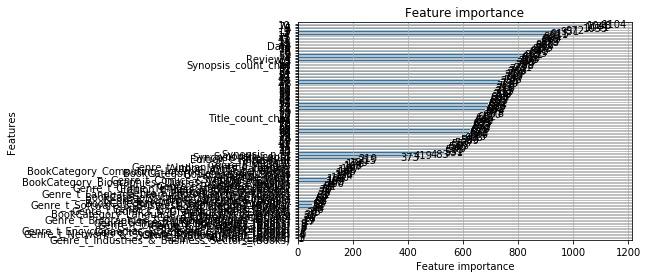

In [55]:
lgb.plot_importance(model)

In [56]:
test_lgb_1 = np.exp(test_lgb)-1
test_xgb_1 = np.exp(test_xgb)-1

In [254]:
answer1 = np.mean(test_xgb_1, axis = 1)

In [57]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [72]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=99)
rf.fit(train, train_label)
answer = rf.predict(test)

Wall time: 2min 43s


In [278]:
answer

array([485.72348, 986.83144, 499.44308, ..., 557.37162, 245.85934,
       890.7543 ])

In [624]:
sample.Price = np.exp(answer)-1

In [58]:
sample.Price = answer1.values

In [59]:
sample.to_excel('answer2.xlsx', index=False)

In [60]:
sample

,Price
0,358.744364
1,1037.119912
2,333.780077
3,963.894901
4,286.962671
...,...
1555,1287.178995
1556,169.246805
1557,486.095760
1558,242.160873


In [183]:
pd.Series(rf.feature_importances_, index = train.columns)

NameError: name 'rf' is not defined

In [313]:
x

,0,1,2
0,5.777148,0.0,0.000000
1,0.000000,0.0,5.910837
2,5.912602,0.0,0.000000
3,5.640060,0.0,0.000000
4,5.920628,0.0,0.000000
...,...,...,...
6224,6.722651,0.0,0.000000
6225,0.000000,0.0,5.849282
6226,6.410926,0.0,0.000000
6227,5.705458,0.0,0.000000


In [630]:
(ntrain_xgb[0]

0       0.000000
1       0.000000
2       0.000000
3       5.405558
4       6.950172
          ...   
6224    6.043969
6225    0.000000
6226    5.796917
6227    0.000000
6228    0.000000
Name: 0, Length: 6229, dtype: float64